In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) #Display all columns

In [2]:
df = pd.read_csv('SuperStore_Sales_Dataset.csv')

# Data cleaning

In [3]:
df.shape

(5903, 21)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,1/1/2019,7/1/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online
1,4919,CA-2019-160304,2/1/2019,7/1/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,NaN,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online
2,4920,CA-2019-160304,2/1/2019,7/1/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards
3,3074,CA-2019-125206,3/1/2019,5/1/2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online
4,8604,US-2019-116365,3/1/2019,8/1/2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online


In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Profit           float64
Returns          float64
Payment Mode      object
dtype: object

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')

In [8]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Payment Mode
count,5903,5903,5903,5903,5903,5903,5903,5900,5901,5903,5903,5903,5903,5903
unique,3003,4,773,773,3,1,452,49,4,1755,3,17,1742,3
top,CA-2020-100111,Standard Class,EP-13915,Emily Phan,Consumer,United States,New York City,California,West,TEC-AC-10003832,Office Supplies,Binders,Easy-staple paper,COD
freq,14,3453,27,27,2997,5903,564,1189,1901,15,3571,916,27,2454


Check and drop duplicates

In [9]:
df.duplicated().sum()

2

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

check null values

In [12]:
df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               3
Region              2
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns          5614
Payment Mode        0
dtype: int64

In [13]:
df.drop(['Returns'],axis=1,inplace=True)

Fill null values 

In [14]:
df[df['State'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
1,4919,CA-2019-160304,2019-02-01,2019-07-01,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,NaN,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,Online
5889,7634,US-2020-158526,2020-12-29,2021-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,NaN,South,OFF-BI-10002414,Office Supplies,Binders,GBC ProClick Spines for 32-Hole Punch,408.530,1,5.8891,COD
5899,5092,CA-2020-156720,2020-12-30,2021-03-01,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,NaN,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,Online


In [15]:
df.loc[df['City']=='Gaithersburg']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
0,4918,CA-2019-160304,2019-01-01,2019-07-01,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,Online
1,4919,CA-2019-160304,2019-02-01,2019-07-01,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,NaN,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,Online
2,4920,CA-2019-160304,2019-02-01,2019-07-01,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,Cards


In [16]:
df.loc[df['Row ID']==4919, 'State'] = 'Maryland'

In [17]:
df.loc[df['City']=='Louisville']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
533,1358,CA-2019-145247,2019-05-05,2019-07-05,First Class,ND-18370,Natalie DeCherney,Consumer,United States,Louisville,Kentucky,South,OFF-PA-10003641,Office Supplies,Paper,Xerox 1909,79.140,3,36.4044,Cards
1494,8770,CA-2019-151148,2019-12-09,2019-09-13,Same Day,PO-19180,Philisse Overcash,Home Office,United States,Louisville,Colorado,West,TEC-PH-10001870,Technology,Phones,Lunatik TT5L-002 Taktik Strike Impact Protecti...,146.952,3,9.1845,Online
1495,8771,CA-2019-151148,2019-12-09,2019-09-13,Same Day,PO-19180,Philisse Overcash,Home Office,United States,Louisville,Colorado,West,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",83.136,4,5.1960,COD
1581,6465,US-2019-155404,2019-09-22,2019-09-28,Standard Class,AS-10630,Ann Steele,Home Office,United States,Louisville,Kentucky,South,FUR-FU-10004586,Furniture,Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,13.280,2,6.3744,Cards
1894,665,CA-2019-143308,2019-04-11,2019-04-11,Same Day,RC-19825,Roy Collins,Consumer,United States,Louisville,Kentucky,South,OFF-FA-10000621,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",10.740,3,5.2626,COD
2560,8580,CA-2019-111605,2019-12-27,2020-02-01,Standard Class,JW-15955,Joni Wasserman,Consumer,United States,Louisville,Kentucky,South,OFF-LA-10002368,Office Supplies,Labels,Avery 479,2.610,1,1.2006,COD
2826,4523,CA-2020-105445,2020-02-20,2020-02-25,Second Class,BP-11095,Bart Pistole,Corporate,United States,Louisville,Colorado,West,OFF-FA-10001229,Office Supplies,Fasteners,Staples,92.432,3,3.0654,Online
3193,3012,CA-2020-134845,2020-04-17,2020-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2579.985,5,-3399.9800,COD
3195,3014,CA-2020-134845,2020-04-17,2020-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,West,OFF-BI-10003355,Office Supplies,Binders,Cardinal Holdit Business Card Pockets,100.964,6,-6.5736,Online
3197,3015,CA-2020-134845,2020-04-17,2020-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,131.736,4,7.2576,Cards


In [18]:
df.loc[df['Row ID']==7634,'State'] = 'Kentucky'

In [19]:
df.loc[df['City']=='Loveland']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
4017,5090,CA-2020-132738,2020-04-08,2020-07-08,First Class,HM-14860,Harry Marie,Corporate,United States,Loveland,Colorado,West,OFF-PA-10001752,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,107.968,2,2.8884,COD
4018,5091,CA-2020-132738,2020-04-08,2020-07-08,First Class,HM-14860,Harry Marie,Corporate,United States,Loveland,Colorado,West,OFF-EN-10001141,Office Supplies,Envelopes,Manila Recycled Extra-Heavyweight Clasp Envelo...,129.784,1,3.1842,Online
5869,6090,US-2020-162068,2020-12-28,2020-12-31,Second Class,PC-18745,Pamela Coakley,Corporate,United States,Loveland,Colorado,West,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,198.188,2,-0.9900,COD
5899,5092,CA-2020-156720,2020-12-30,2021-03-01,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,NaN,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,Online
5901,5093,CA-2020-151450,2020-12-31,2021-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,2975.510,3,-0.6048,COD


In [20]:
df.loc[df['Row ID']==5092,'State'] = 'Colorado'

In [21]:
df[df['Region'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
5,8605,US-2019-116365,2019-03-01,2019-08-01,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,NaN,TEC-AC-10002942,Technology,Accessories,WD My Passport Ultra 1TB Portable External Har...,165.600,3,-6.210,Online
21,7809,US-2019-137295,2019-08-01,2019-01-13,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Raleigh,North Carolina,NaN,OFF-AR-10001955,Office Supplies,Art,Newell 319,47.616,3,5.952,COD


In [22]:
df.loc[df['State']=='Texas'].head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
4,8604,US-2019-116365,2019-03-01,2019-08-01,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.264,Online
5,8605,US-2019-116365,2019-03-01,2019-08-01,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,NaN,TEC-AC-10002942,Technology,Accessories,WD My Passport Ultra 1TB Portable External Har...,165.60,3,-6.210,Online
6,8606,US-2019-116365,2019-03-01,2019-08-01,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-PH-10002890,Technology,Phones,AT&T 17929 Lendline Telephone,180.96,5,13.572,Cards


In [23]:
df.loc[df['Row ID']==8605,'Region'] = 'Central'

In [24]:
df.loc[df['State']=='North Carolina'].head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
9,2898,US-2019-164630,2019-04-01,2019-09-01,Standard Class,EB-13975,Erica Bern,Corporate,United States,Charlotte,North Carolina,South,TEC-CO-10000971,Technology,Copiers,Hewlett Packard 310 Color Digital Copier,959.968,4,119.9960,Online
20,7808,US-2019-137295,2019-08-01,2019-01-13,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Raleigh,North Carolina,South,OFF-BI-10004236,Office Supplies,Binders,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",30.828,7,-24.6624,Cards
21,7809,US-2019-137295,2019-08-01,2019-01-13,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Raleigh,North Carolina,NaN,OFF-AR-10001955,Office Supplies,Art,Newell 319,47.616,3,5.9520,COD


In [25]:
df.loc[df['Row ID']==7809,'Region'] = 'South'

In [26]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
Payment Mode     0
dtype: int64

In [27]:
df.describe()

,Row ID,Sales,Quantity,Profit
count,5901.000000,5901.000000,5901.000000,5901.000000
mean,5022.422471,265.345589,3.781901,29.700408
std,2877.977184,474.260645,2.212917,259.589138
min,1.000000,0.836000,1.000000,-6599.978000
25%,2486.000000,71.976000,2.000000,1.795500
50%,5091.000000,128.648000,3.000000,8.502500
75%,7456.000000,265.170000,5.000000,28.615000
max,9994.000000,9099.930000,14.000000,8399.976000


In [74]:
df.to_csv('SuperStore_final')

# Exploratory Data Analysis

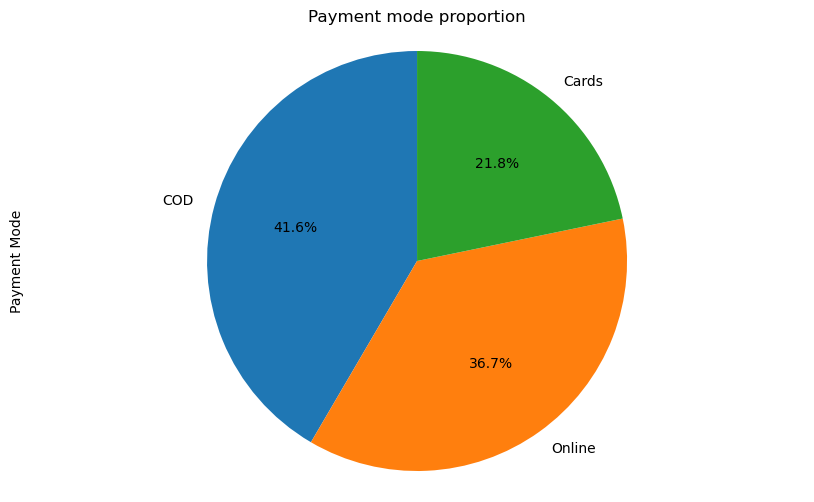

In [28]:
#Which payment mode was used the most
df['Payment Mode'].value_counts().plot(kind='pie',
                                       figsize=(10,6),
                                       autopct='%1.1f%%',
                                       startangle=90)

plt.axis('equal')
plt.title('Payment mode proportion')
plt.show()

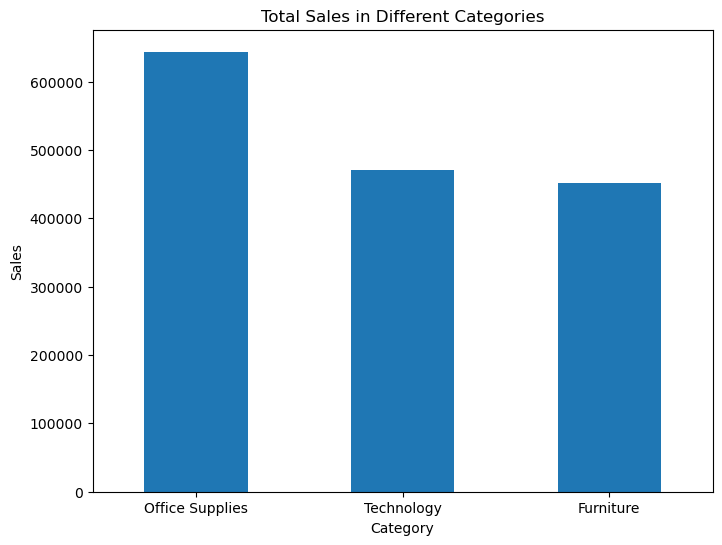

In [29]:
#category with the most sales
df.groupby('Category')[['Sales']].sum().sort_values('Sales',ascending=False).plot(kind='bar',
                                                                                  figsize=(8,6),
                                                                                  rot=0,
                                                                                  legend=False)
plt.title('Total Sales in Different Categories')
plt.ylabel('Sales')
plt.show()

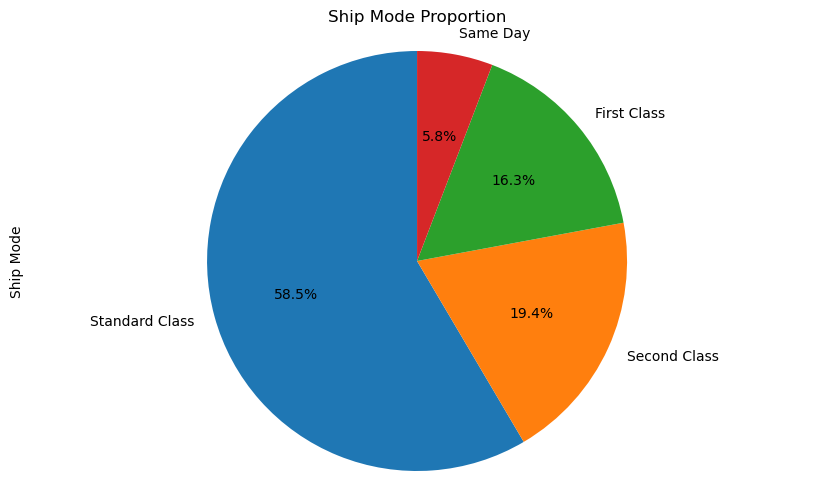

In [98]:
df['Ship Mode'].value_counts().plot(kind='pie',
                                    figsize=(10,6),
                                    autopct='%1.1f%%',
                                    startangle=90)
plt.title('Ship Mode Proportion')
plt.axis('equal')
plt.show()

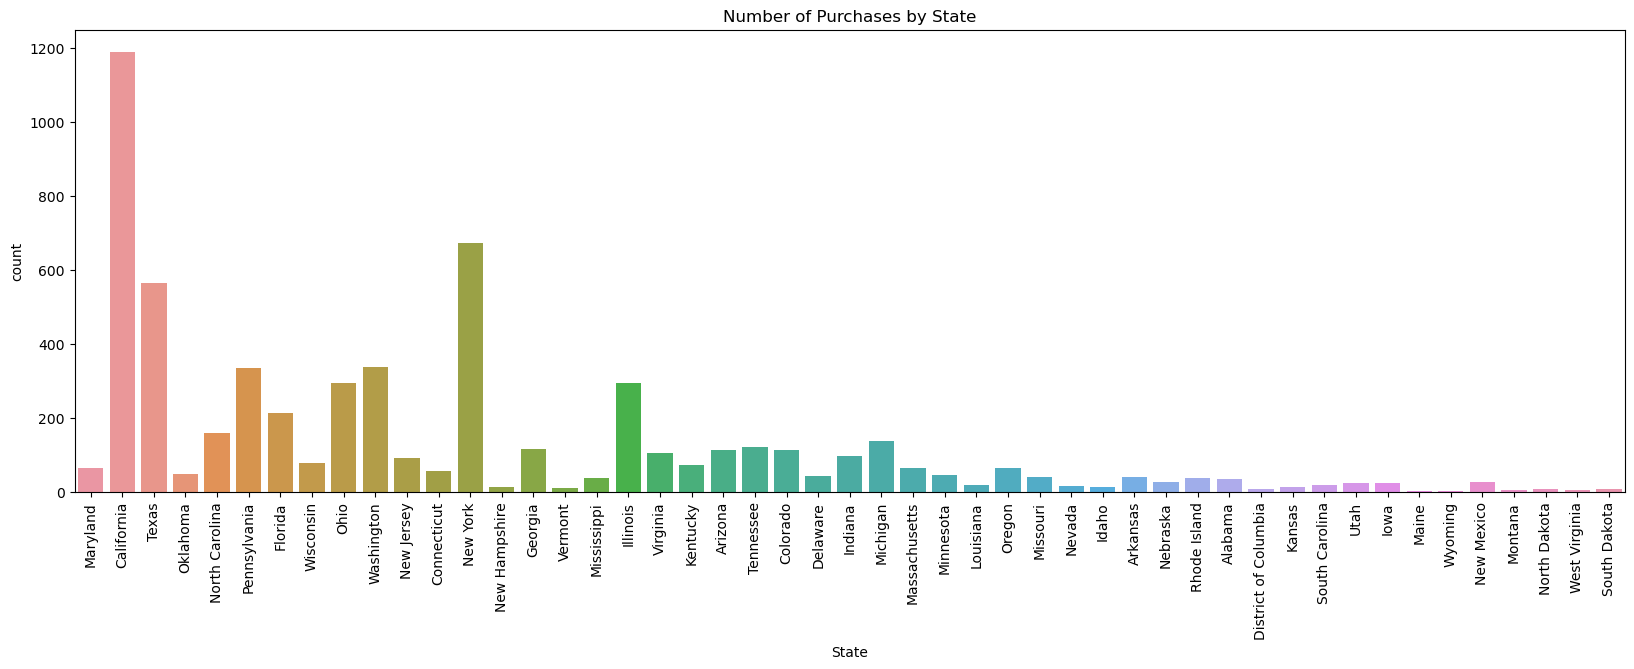

In [92]:
plt.figure(figsize=(20,6))
sns.countplot(x='State',data=df)
plt.xticks(rotation=90)
plt.title('Number of Purchases by State')
plt.show()

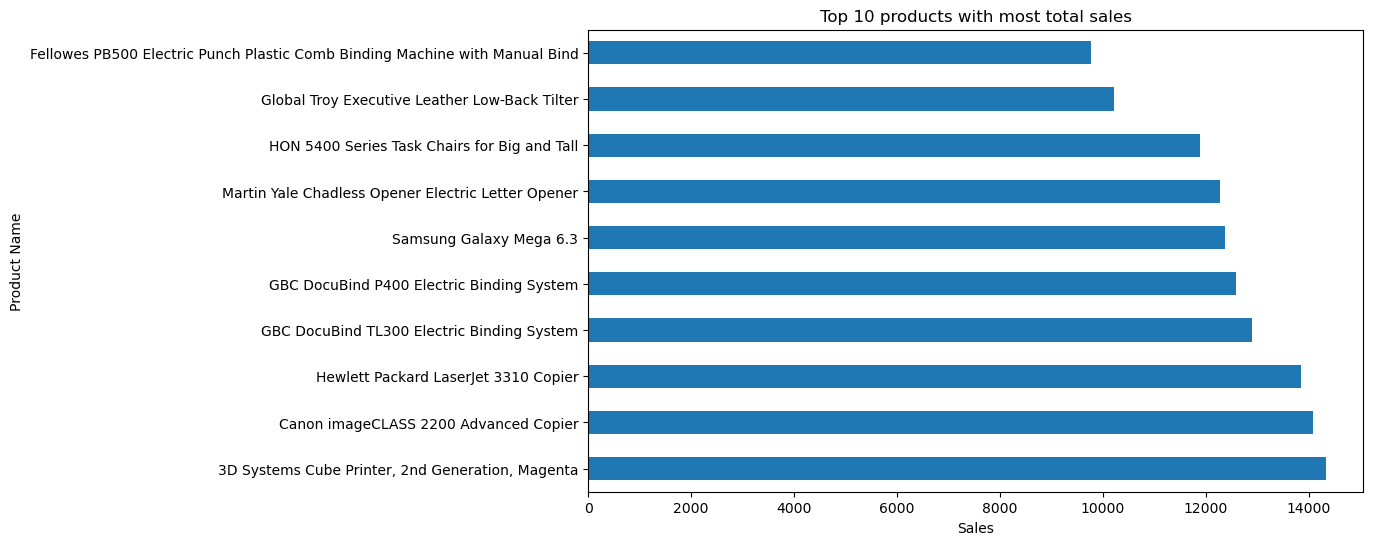

In [56]:
#Top 10 products with most total sales
df.groupby('Product Name')[['Sales']].sum().nlargest(10,'Sales').plot(kind='barh',
                                                                      figsize=(10,6),
                                                                      legend=False)

plt.title('Top 10 products with most total sales')
plt.xlabel('Sales')
plt.show()

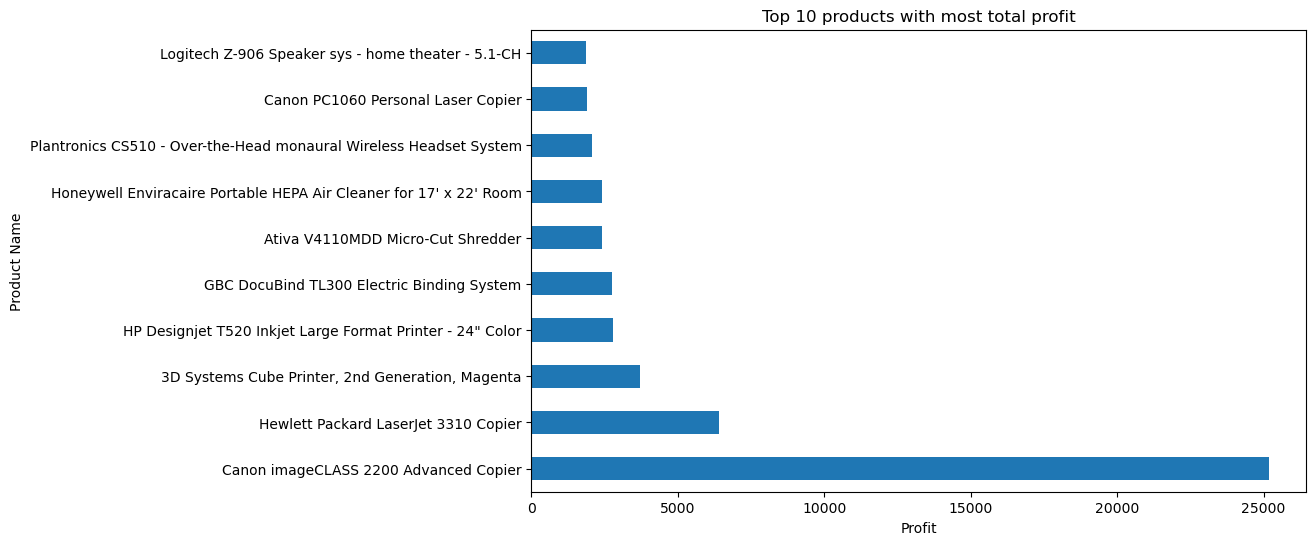

In [57]:
#Top 10 products with most total profit
df.groupby('Product Name')[['Profit']].sum().nlargest(10,'Profit').plot(kind='barh',
                                                                    figsize=(10,6),
                                                                    legend=False)

plt.xlabel('Profit')
plt.title('Top 10 products with most total profit')
plt.show()

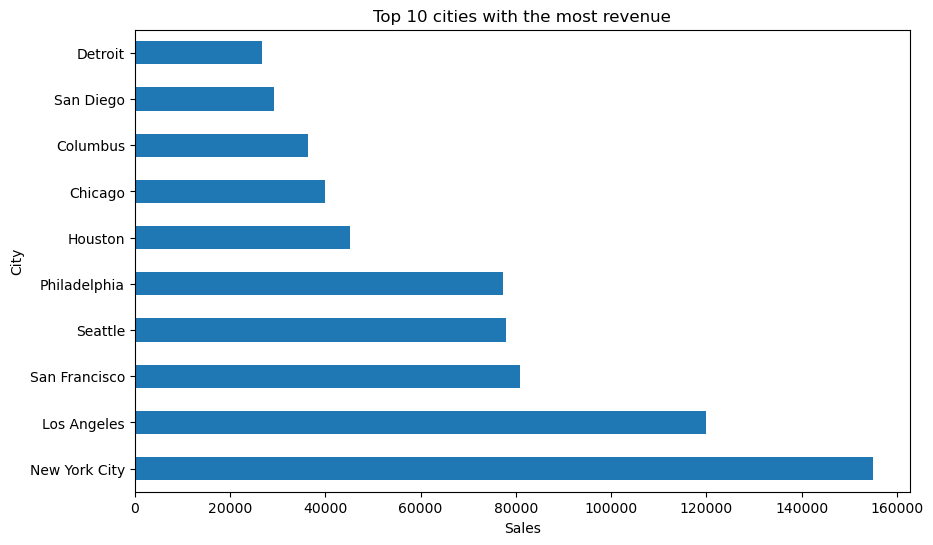

In [59]:
#Top 10 city with the most revenue 
df.groupby('City')[['Sales']].sum().nlargest(10,'Sales').plot(kind='barh',
                                                              figsize=(10,6),
                                                              legend=False)

plt.title('Top 10 cities with the most revenue')
plt.xlabel('Sales')
plt.show()

In [75]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

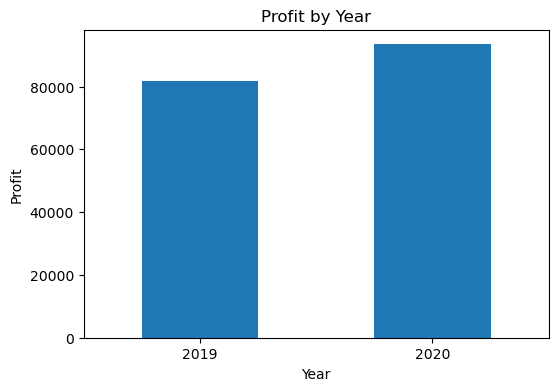

In [81]:
#Which year has the most profit
df.groupby('Year')[['Profit']].sum().plot(kind='bar',figsize=(6,4),rot=0,legend=False)

plt.ylabel('Profit')
plt.title('Profit by Year')
plt.show()

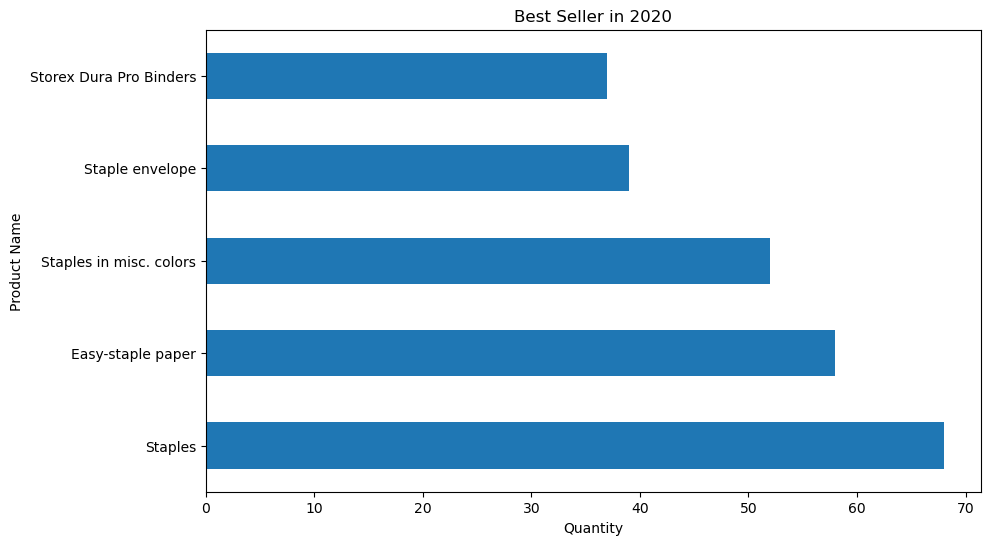

In [83]:
#Which product is the best seller in 2020?
df[df['Year']==2020].groupby('Product Name')[['Quantity']].sum().nlargest(5,'Quantity').plot(kind = 'barh',
                                                                                             figsize=(10,6),
                                                                                             legend=False)
plt.xlabel('Quantity')
plt.title('Best Seller in 2020')
plt.show()

#Conclusion
- COD is the most common payment mode with 41.6%
- Office supply is the category with most total sales
- California is the State which buy the most
- Standard Class is the most popular ship mode with 58.5%
- The product with most total  total is Cannon imageClass 2200 Advanced Coppier and the product with most sales profit is 3D system cube printer
- Newyork City is the biggest customer segment
- 2020 has much profit than 2019 and the best seller is Staples